In [1]:
Name = "Pritesh Vijay Anand"
Student_id = "47975547"

In [2]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading csv dataset
df = pd.read_csv('car_sell.csv')
print(df.head())


   Unnamed: 0                      name    year  selling_price  km_driven  \
0           0             Maruti 800 AC  2007.0          60000      70000   
1           1  Maruti Wagon R LXI Minor  2007.0         135000      50000   
2           2      Hyundai Verna 1.6 SX  2012.0         600000     100000   
3           3    Datsun RediGO T Option  2017.0         250000      46000   
4           4     Honda Amaze VX i-DTEC  2014.0         450000     141000   

     fuel seller_type transmission         owner  
0  Petrol  Individual       Manual   First Owner  
1  Petrol  Individual       Manual   First Owner  
2  Diesel  Individual       Manual   First Owner  
3  Petrol  Individual       Manual   First Owner  
4  Diesel  Individual       Manual  Second Owner  


**Q1. REMOVE MISSING DATA**

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.

In [5]:

# Q1. REMOVE MISSING DATA

# Count total missing values in each column
print("Count of missing/null values in each column:")
print(df.isnull().sum())

# Count of missing values in 'year'
missing_year = df['year'].isnull().sum()
print("\nCount of missing values in 'year' column:", missing_year)

# Count where fuel value is 'none'
missing_fuel = df['fuel'].value_counts().get('none', 0)
print("\nCount of 'none' in fuel column:", missing_fuel)


# Length without removing data
initial_length = len(df)
print("\nLength of dataset before removing missing data is:", initial_length)


# Drop rows with missing 'year' values
df = df.dropna(subset=['year'])


# Drop rows where 'fuel' is 'none'
df = df[df['fuel'] != 'none']


# Length after removing missing values
final_length = len(df)
print("\nLength of dataset after removing missing values:", final_length)



Count of missing/null values in each column:
Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

Count of missing values in 'year' column: 310

Count of 'none' in fuel column: 159

Length of dataset before removing missing data is: 4340

Length of dataset after removing missing values: 3886


**Q2. DESCRIPTIVE STATISTICS**


* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type
'''

In [6]:
# Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner

print("-------Names--------")
print("Unique names:", df['name'].unique())
print("Count of unique names:", df['name'].nunique())

print("\n-------Seller Type--------")
print("Unique seller type:", df['seller_type'].unique())
print("Count of unique names:", df['name'].nunique())

print("\n-------Transmission--------")
print("Unique transmission:", df['transmission'].unique())
print("Count of unique transmission:", df['transmission'].nunique())

print("\n-------Owners--------")
print("Unique owner:", df['owner'].unique())
print("Count of unique owners:", df['owner'].nunique())



-------Names--------
Unique names: ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
Count of unique names: 1402

-------Seller Type--------
Unique seller type: ['Individual' 'Dealer' 'Trustmark Dealer']
Count of unique names: 1402

-------Transmission--------
Unique transmission: ['Manual' 'Automatic']
Count of unique transmission: 2

-------Owners--------
Unique owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
Count of unique owners: 5


In [7]:
#Q2.2 Calculate descriptive statistics of kms driven

print("----DESCRIPTIVE STATISTICS OF KILOMETERS DRIVEN-----")
total_number = df['km_driven'].count()
mean_km = df['km_driven'].mean().round(2)
std_km = df['km_driven'].std().round(2)
min_km = df['km_driven'].min().round(2)
max_km = df['km_driven'].max().round(2)

# Display the results
print(f"Total number of kms driven: {total_number}")
print(f"Mean: {mean_km}")
print(f"Standard Deviation: {std_km}")
print(f"Minimum: {min_km}")
print(f"Maximum: {max_km}")


----DESCRIPTIVE STATISTICS OF KILOMETERS DRIVEN-----
Total number of kms driven: 3886
Mean: 66313.28
Standard Deviation: 46679.6
Minimum: 1
Maximum: 806599


In [8]:
#Q2.3 Group by seller_type and calculate descriptive statistics

grouped_stats = df.groupby('seller_type')['selling_price'].agg(['mean', 'std', 'min', 'max'])

print("----DESCRIPTIVE STATISTICS OF SELLING PRICE GROUPED BY SELLER TYPE-----")

# Display the results
print(grouped_stats.round(2))

----DESCRIPTIVE STATISTICS OF SELLING PRICE GROUPED BY SELLER TYPE-----
                       mean        std     min      max
seller_type                                            
Dealer            702093.31  813597.81   22000  8900000
Individual        421169.41  420273.68   20000  4800000
Trustmark Dealer  935797.87  655724.30  315000  2600000


In [9]:
# Q2.4 Group by 'owner' and calculate descriptive statistics

current_year = 2024
df['years_owned'] = current_year - df['year']

print("----DESCRIPTIVE STATISTICS OF SELLING PRICE GROUPED BY OWNER-----")

grouped_stats = df.groupby('owner')['years_owned'].agg(['mean', 'std', 'min', 'max']).round(2)

# Display the results
print(grouped_stats)

----DESCRIPTIVE STATISTICS OF SELLING PRICE GROUPED BY OWNER-----
                       mean   std  min   max
owner                                       
First Owner            9.55  3.56  4.0  28.0
Fourth & Above Owner  16.76  5.25  4.0  32.0
Second Owner          13.02  3.84  5.0  29.0
Test Drive Car         4.36  0.63  4.0   6.0
Third Owner           14.59  3.92  5.0  27.0


**Q3. PLOTTING AND ANALYSIS**

<Figure size 1000x600 with 0 Axes>

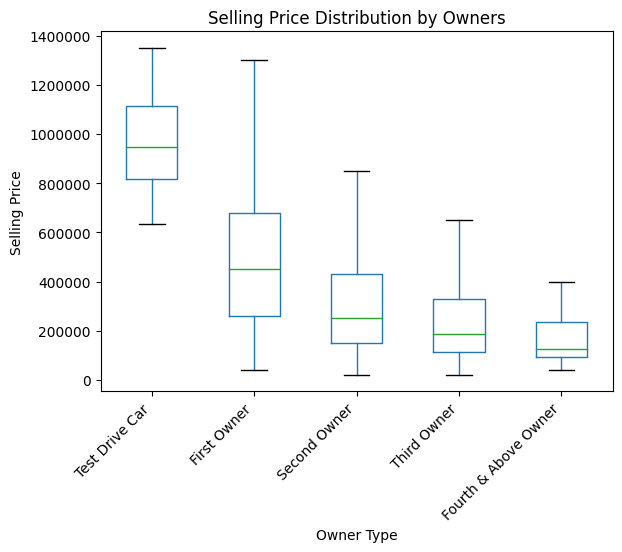

In [10]:
#BOX PLOT OF SELLING PRICE ACCORDING TO OWNER


# Calculate the median selling price for each owner type and sort them
median_prices = df.groupby('owner')['selling_price'].median().sort_values(ascending=False)

# Reorder the owner types in the DataFrame based on the sorted medians
df['owner'] = pd.Categorical(df['owner'], categories=median_prices.index, ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
df.boxplot(column='selling_price', by='owner', showfliers=False, grid=False)  # 'grid=False' removes grid lines
plt.title('Selling Price Distribution by Owners')
plt.suptitle('')  # This removes the default title added by boxplot
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Rotate the x labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.show()


In the box plot of selling prices across different owner types, Test Drive Cars have the highest median price, followed by First Owner, Second Owner, Third Owner, and Fourth & Above Owner vehicles, which have the lowest median price. The First Owner category shows a wide range of prices, indicating variability in vehicle conditions or types, while the Fourth & Above Owner category has the smallest range, suggesting more uniform and generally lower pricing. The box in each plot represents the middle 50% of the data (interquartile range), with the median line inside it showing the central tendency. The whiskers extend to the smallest and largest values within a reasonable range, while any points outside the whiskers are outliers, indicating unusually high or low prices.

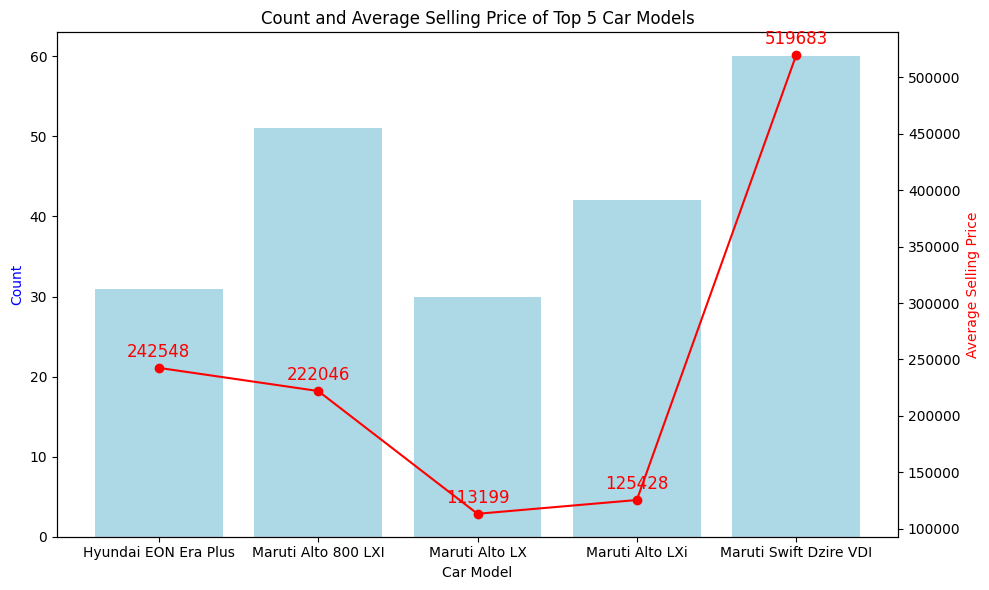

In [11]:
#PLOTTING THE TOP 5 CAR MODELS PURCHASED OVER THE OVERS ALONG WITH THEIR AVERAGE SELLING PRICE

import matplotlib.pyplot as plt
import pandas as pd

# Get the count of each car model and identify the top 5
top_cars = df['name'].value_counts().head(5)

# Calculate the average selling price for the top 5 cars
avg_price_top_cars = df[df['name'].isin(top_cars.index)].groupby('name')['selling_price'].mean()

# Combine the count and average selling price into a single DataFrame
top_cars_df = pd.DataFrame({
    'count': top_cars,
    'avg_selling_price': avg_price_top_cars
})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for the count of top 5 cars
ax1.bar(top_cars_df.index, top_cars_df['count'], color='lightblue')
ax1.set_xlabel('Car Model')
ax1.set_ylabel('Count', color='blue')
ax1.set_title('Count and Average Selling Price of Top 5 Car Models')

# Create a second y-axis for the average selling price
ax2 = ax1.twinx()
ax2.plot(top_cars_df.index, top_cars_df['avg_selling_price'], color='red', marker='o')
ax2.set_ylabel('Average Selling Price', color='red')

# Annotate average selling prices
for i, price in enumerate(top_cars_df['avg_selling_price']):
    ax2.annotate(f'{int(price)}', (i, price), ha='center', va='bottom', fontsize=12, color='red', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The plot combines a bar chart and a line chart to show the top 5 most purchased car models along with their average selling prices. The Maruti Swift Dzire stands out as the model with both the highest purchase count and the highest average selling price, indicating it is the most popular and valuable model among the top 5. This suggests that the Swift Dzire retains its market value well and is in high demand.

<ipython-input-12-508043348a5e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_kms_price = df.groupby('owner').agg({'km_driven': 'mean', 'selling_price': 'mean'}).reset_index()
<ipython-input-12-508043348a5e>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Average Selling Price')


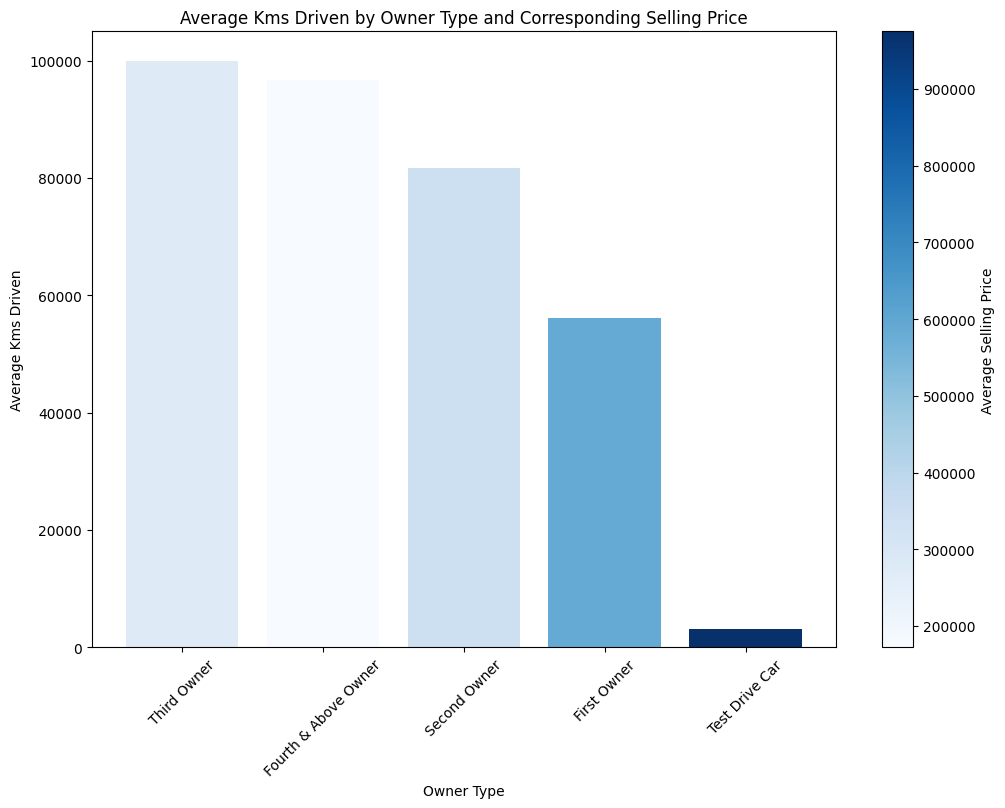

In [12]:
#PLOTTING BAR GRAPH OF THE AVG KM DRIVEN AND SELLING PRICE DEPENDING ON OWNER


#Calculating the average kms_driven and selling_price for each owner type
avg_kms_price = df.groupby('owner').agg({'km_driven': 'mean', 'selling_price': 'mean'}).reset_index()

#Sorting the DataFrame by kms_driven in descending order
avg_kms_price = avg_kms_price.sort_values(by='km_driven', ascending=False)

# Normalize the selling_price for color mapping
norm = plt.Normalize(vmin=avg_kms_price['selling_price'].min(), vmax=avg_kms_price['selling_price'].max())
colors = plt.cm.Blues(norm(avg_kms_price['selling_price']))

# Step 3: Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(avg_kms_price['owner'], avg_kms_price['km_driven'], color=colors)

# Adding color bar legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Average Selling Price')

plt.title('Average Kms Driven by Owner Type and Corresponding Selling Price')
plt.xlabel('Owner Type')
plt.ylabel('Average Kms Driven')
plt.xticks(rotation=45)
plt.show()


The bar plot reveals that Third Owner vehicles have the highest average kilometers driven, indicating they have been used the most extensively. In contrast, Test Drive Cars have the least kilometers driven on average but command the highest selling price, likely due to their minimal usage and relatively new condition.

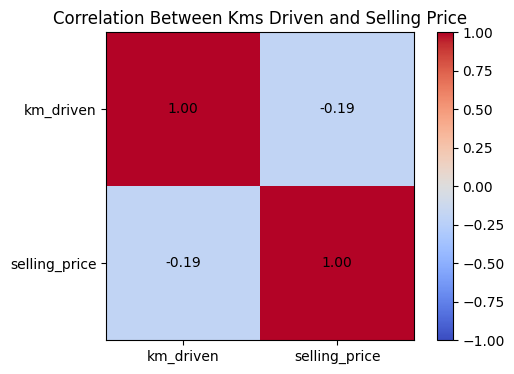

In [13]:
#HEAT MAP TO DEPICT CORRELATION BETWEEN KM DRIVEN AND SELLING PRICE


# Calculate the correlation matrix
corr_matrix = df[['km_driven', 'selling_price']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add color bar
plt.colorbar()

# Add annotations
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Set axis labels and title
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
plt.title('Correlation Between Kms Driven and Selling Price')

plt.show()



The heatmap shows a weak negative correlation (-0.19) between kilometers driven and selling price, indicating that as the number of kilometers driven increases, the selling price tends to decrease slightly

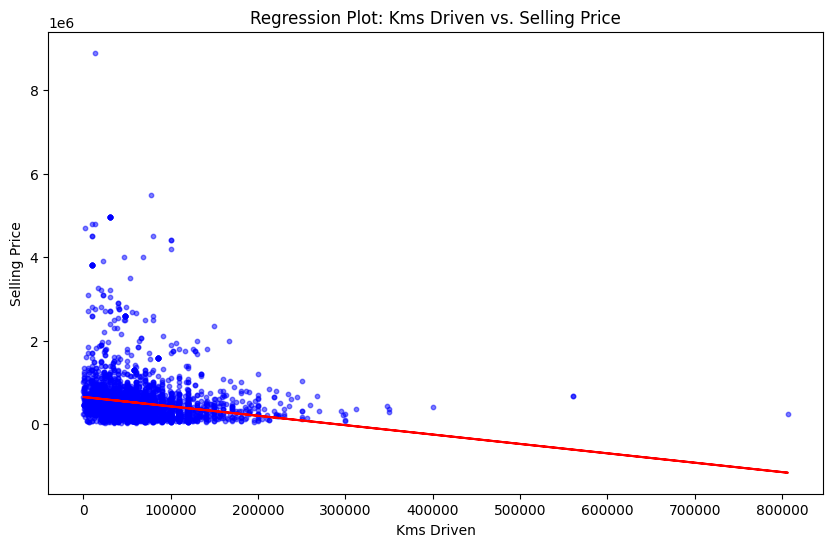

In [14]:
#REGRESSION PLOT FOR KMS DRIVEN AND SELLING PRICE

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['km_driven'], df['selling_price'], s=10, color='blue', alpha=0.5)

# Line of best fit (regression line)
m, b = np.polyfit(df['km_driven'], df['selling_price'], 1)
plt.plot(df['km_driven'], m * df['km_driven'] + b, color='red')

# Titles and labels
plt.title('Regression Plot: Kms Driven vs. Selling Price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')

plt.show()



After establishing a weak negative correlation (-0.19) between kilometers driven and selling price, a regression plot was generated to further explore this relationship. The downward-sloping regression line confirms that as kilometers driven increase, the selling price tends to decrease, likely indicating that the car has been used extensively, potentially passed through multiple owners, and thus holds a lower market value.

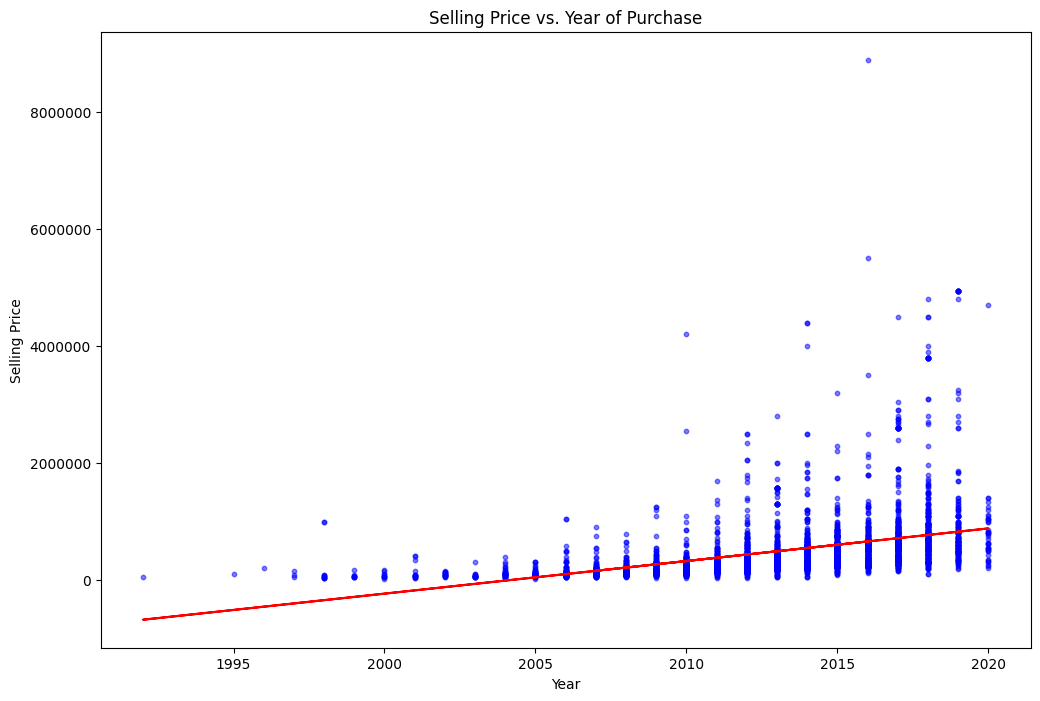

In [15]:
#REGRESSION PLOT YEAR OF PURCHASE AND SELLING PRICE

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(df['year'], df['selling_price'], s=10, color='blue', alpha=0.5)

# Line of best fit (regression line)
m, b = np.polyfit(df['year'], df['selling_price'], 1)
plt.plot(df['year'], m*df['year'] + b, color='red')

# Titles and labels
plt.title('Selling Price vs. Year of Purchase')
plt.xlabel('Year')
plt.ylabel('Selling Price')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show()


The scatter plot with a red trend line shows an upward trend, indicating a positive correlation between the year of purchase and the selling price. This suggests that cars sold in more recent years tend to fetch higher prices compared to those sold in earlier years, reflecting how the market value of vehicles generally increases with newer sales years.

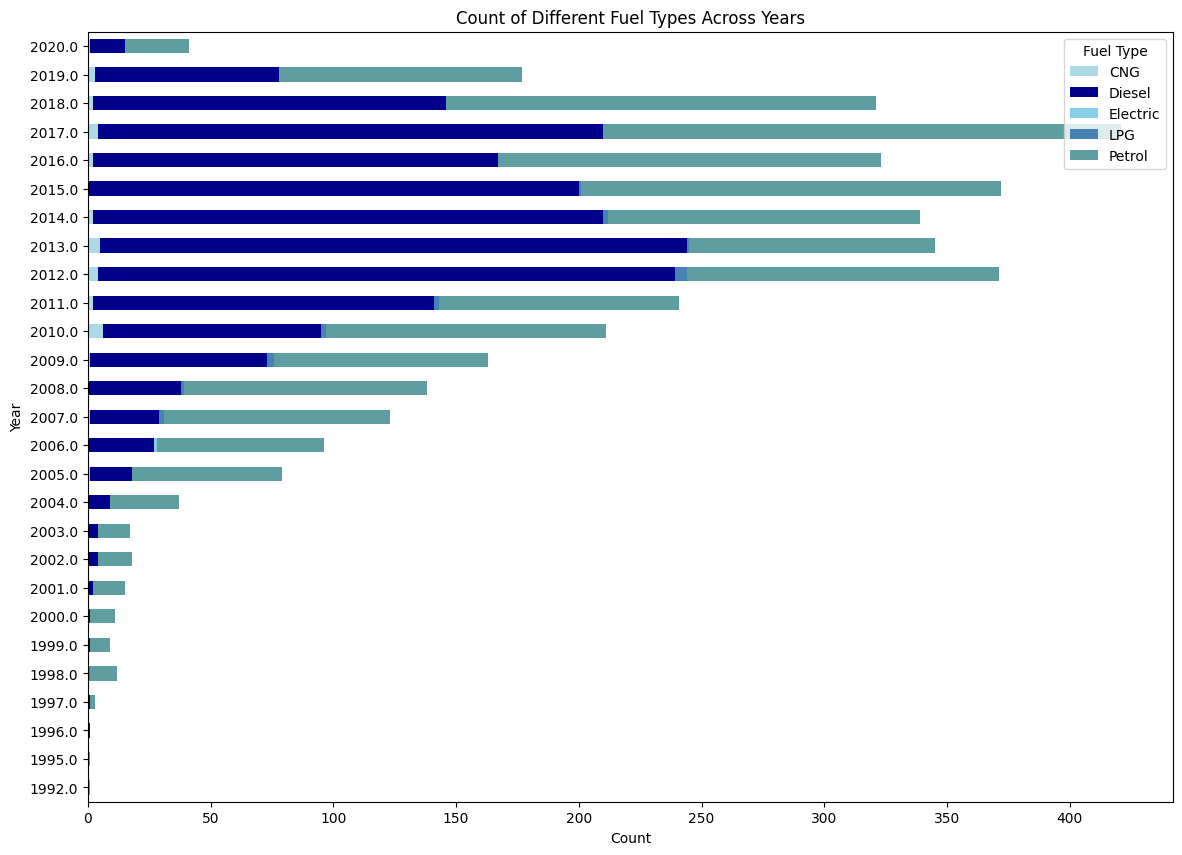

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a pivot table to count the occurrences of each fuel type per year
fuel_counts = df.pivot_table(index='year', columns='fuel', aggfunc='size', fill_value=0)

# Define five shades of blue
colors = ['#add8e6', '#00008b', '#87ceeb', '#4682b4', '#5f9ea0']  # Light Blue, Dark Blue, Sky Blue, Steel Blue, Cadet Blue

# Plotting
fuel_counts.plot(kind='barh', stacked=True, figsize=(14, 10), color=colors)
plt.title('Count of Different Fuel Types Across Years')
plt.xlabel('Count')
plt.ylabel('Year')
plt.legend(title='Fuel Type', loc='upper right')
plt.show()


The horizontal stacked bar plot reveals that diesel and petrol are the most common and preferred fuel types across the years. The plot shows how the distribution of these fuel types has changed over time, with diesel and petrol consistently having the highest counts compared to other fuel types. This trend suggests a strong market preference for these conventional fuels, while the adoption of alternative fuels remains limited in comparison.

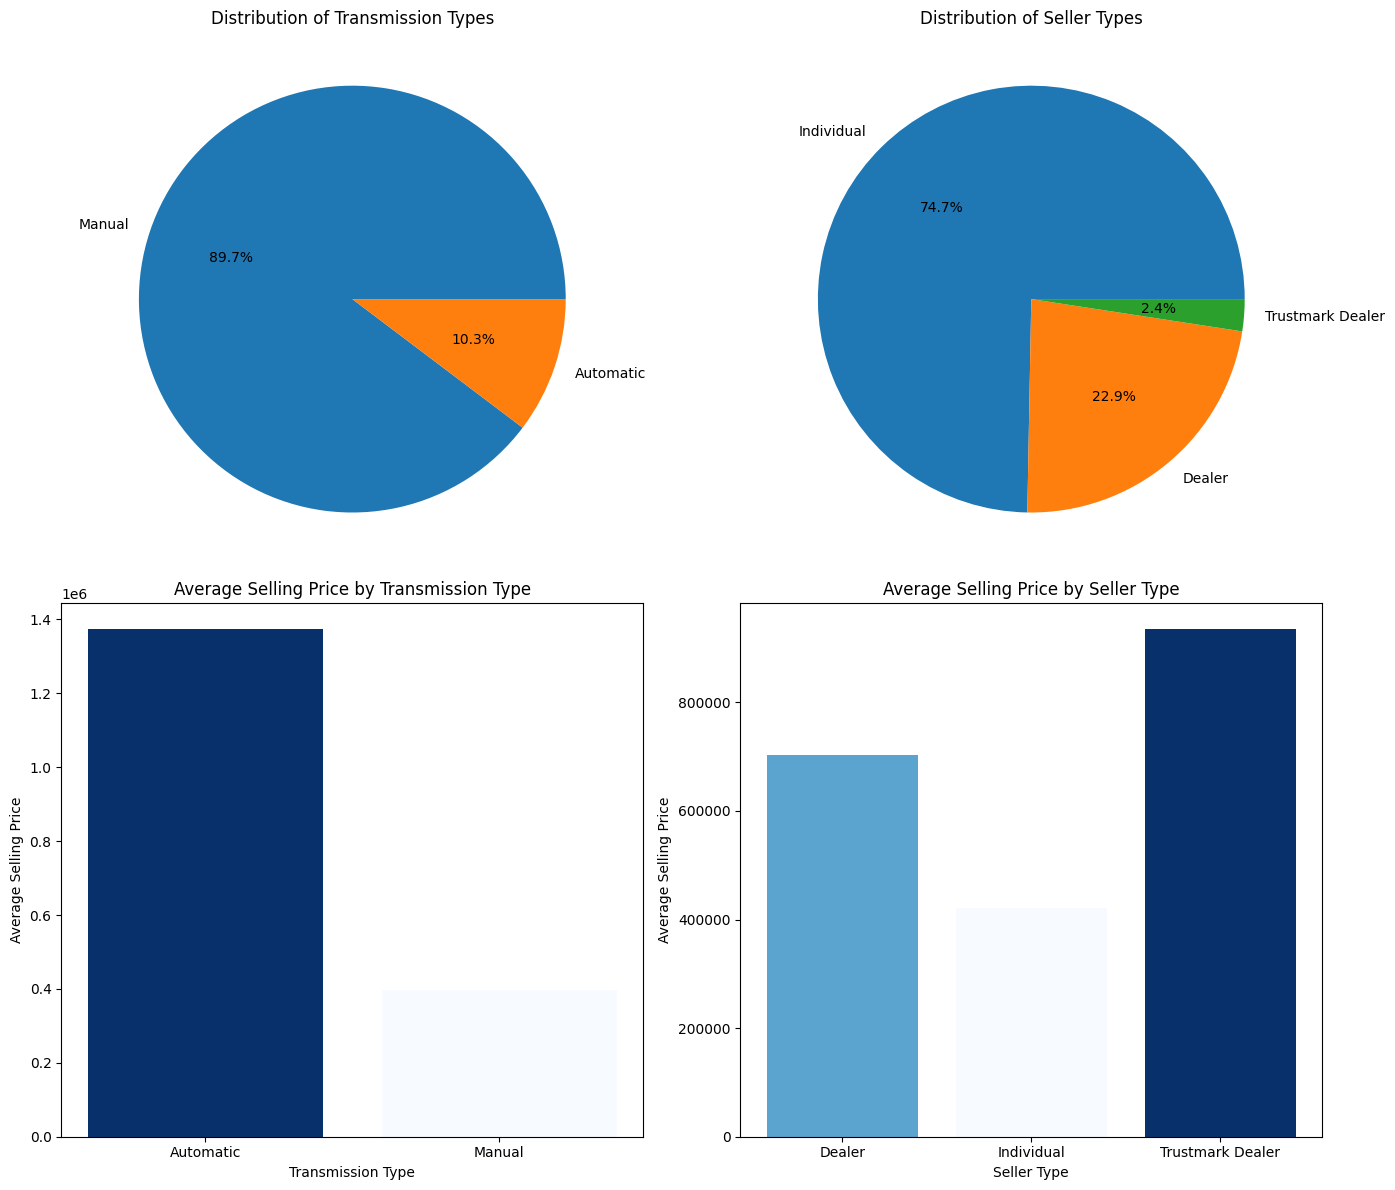

In [17]:
#PIE CHARTS AND BAR GRAPHS TO SHOW DISTRIBUTION OF TRANSMISSION AND SELLER TYPE

# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Pie Chart for Transmission Type Distribution
transmission_counts = df['transmission'].value_counts()
axes[0, 0].pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Distribution of Transmission Types')

# Pie Chart for Seller Type Distribution
seller_type_counts = df['seller_type'].value_counts()
axes[0, 1].pie(seller_type_counts, labels=seller_type_counts.index, autopct='%1.1f%%')
axes[0, 1].set_title('Distribution of Seller Types')

# Bar Plot for Average Selling Price by Transmission Type
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean().reset_index()

# Normalize the selling price for color mapping
norm_transmission = plt.Normalize(vmin=avg_price_by_transmission['selling_price'].min(), vmax=avg_price_by_transmission['selling_price'].max())
colors_transmission = plt.cm.Blues(norm_transmission(avg_price_by_transmission['selling_price']))

axes[1, 0].bar(avg_price_by_transmission['transmission'], avg_price_by_transmission['selling_price'], color=colors_transmission)
axes[1, 0].set_title('Average Selling Price by Transmission Type')
axes[1, 0].set_xlabel('Transmission Type')
axes[1, 0].set_ylabel('Average Selling Price')

# Bar Plot for Average Selling Price by Seller Type
avg_price_by_seller_type = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Normalize the selling price for color mapping
norm_seller_type = plt.Normalize(vmin=avg_price_by_seller_type['selling_price'].min(), vmax=avg_price_by_seller_type['selling_price'].max())
colors_seller_type = plt.cm.Blues(norm_seller_type(avg_price_by_seller_type['selling_price']))

axes[1, 1].bar(avg_price_by_seller_type['seller_type'], avg_price_by_seller_type['selling_price'], color=colors_seller_type)
axes[1, 1].set_title('Average Selling Price by Seller Type')
axes[1, 1].set_xlabel('Seller Type')
axes[1, 1].set_ylabel('Average Selling Price')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


This visualization includes two pie charts and two bar graphs that together provide insights into the distribution and pricing of cars based on transmission type and seller type:



The pie charts show the distribution of cars by count for transmission and seller type. The charts reveal that manual transmission cars are purchased more frequently, and individual sellers are the most common seller type.


The bar graphs display the average selling price for each transmission and seller type. They indicate that manual transmission cars and cars sold by individual sellers have lower average selling prices, which might explain their higher purchase counts. Conversely, automatic transmission cars and those sold by Trustmark dealers have higher average selling prices, potentially leading to their lower purchase counts.

This suggests a possible correlation where cars with lower average selling prices are more commonly bought, while those with higher prices are purchased less frequently.








**Q4. DETECT AND REMOVE OUTLIERS**
1. Owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

In [18]:
import pandas as pd
print("Length of dataset before removing outliers is", len(df))

# Define the conditions
conditions = (
    df['owner'].isin(['First Owner', 'Second Owner', 'Third Owner']) &
    df['fuel'].isin(['Diesel', 'Petrol']) &
    df['seller_type'].isin(['Dealer', 'Individual'])
)

# Filter the DataFrame based on the conditions
filtered_df = df[conditions]

# Print the length of the filtered data
print("Length of dataset after removing outliers is", len(filtered_df))



Length of dataset before removing outliers is 3886
Length of dataset after removing outliers is 3657


OVERALL ANALYSIS :
1. Maruti Swift Dzire VDI was the most purchased car model.
2. Test drive owners have driven the least kms and have the highest selling price. On the other hand, third owners have driven most kms. Fourth owners have the least selling prices.
3. There is a negative correlation between kms driven and selling price.
4. There is a positive correlation between years and selling price.
5. Diesel and Petrol are most commonly used fuels over the years.
6. Manual cars are purchased more than automatic and are sold at a cheaper price than automatic.
7. Individual sellers are more than other seller types and they too are sold at a lesser price.